In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import re

BUS_PATH = "../Singapore_bus"
dirs = os.listdir(BUS_PATH)
Bus_FileName_DirList = dirs
Bus_FileName_DirList
Bus_FileName_DirList = sorted(Bus_FileName_DirList)

In [5]:
weekday = [15, 16, 17, 18, 19, 20, 21]

In [6]:
data_day = pd.read_csv(os.path.join(BUS_PATH, Bus_FileName_DirList[9]))

In [7]:
import pandas as pd

# 生成日期时间索引，每天只取5:30到23:30
index_16th = pd.date_range(start='2017-01-16 05:30',
                           end='2017-01-16 23:30', freq='15T')
index_16th_data = pd.DataFrame(index=index_16th, columns=['num'], data=0)

index_17th = pd.date_range(start='2017-01-17 05:30',
                           end='2017-01-17 23:30', freq='15T')
index_17th_data = pd.DataFrame(index=index_17th, columns=['num'], data=0)

index_18th = pd.date_range(start='2017-01-18 05:30',
                           end='2017-01-18 23:30', freq='15T')
index_18th_data = pd.DataFrame(index=index_18th, columns=['num'], data=0)

index_19th = pd.date_range(start='2017-01-19 05:30',
                           end='2017-01-19 23:30', freq='15T')
index_19th_data = pd.DataFrame(index=index_19th, columns=['num'], data=0)

index_20th = pd.date_range(start='2017-01-20 05:30',
                           end='2017-01-20 23:30', freq='15T')
index_20th_data = pd.DataFrame(index=index_20th, columns=['num'], data=0)

index_21th = pd.date_range(start='2017-01-21 05:30',
                           end='2017-01-21 23:30', freq='15T')
index_21th_data = pd.DataFrame(index=index_21th, columns=['num'], data=0)

index_22th = pd.date_range(start='2017-01-22 05:30',
                           end='2017-01-22 23:30', freq='15T')
index_22th_data = pd.DataFrame(index=index_22th, columns=['num'], data=0)


# 合并索引
merged_index = index_16th.union(index_17th).union(index_18th).union(
    index_19th).union(index_20th).union(index_21th).union(index_22th)
# 打印结果

index_data = [index_16th_data, index_17th_data, index_18th_data,
              index_19th_data, index_20th_data, index_21th_data, index_22th_data,]
print(merged_index)

DatetimeIndex(['2017-01-16 05:30:00', '2017-01-16 05:45:00',
               '2017-01-16 06:00:00', '2017-01-16 06:15:00',
               '2017-01-16 06:30:00', '2017-01-16 06:45:00',
               '2017-01-16 07:00:00', '2017-01-16 07:15:00',
               '2017-01-16 07:30:00', '2017-01-16 07:45:00',
               ...
               '2017-01-22 21:15:00', '2017-01-22 21:30:00',
               '2017-01-22 21:45:00', '2017-01-22 22:00:00',
               '2017-01-22 22:15:00', '2017-01-22 22:30:00',
               '2017-01-22 22:45:00', '2017-01-22 23:00:00',
               '2017-01-22 23:15:00', '2017-01-22 23:30:00'],
              dtype='datetime64[ns]', length=511, freq=None)


/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_43840/3875662354.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index_16th = pd.date_range(start='2017-01-16 05:30',
/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_43840/3875662354.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index_17th = pd.date_range(start='2017-01-17 05:30',
/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_43840/3875662354.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index_18th = pd.date_range(start='2017-01-18 05:30',
/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_43840/3875662354.py:16: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index_19th = pd.date_range(start='2017-01-19 05:30',
/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/i

In [8]:
data_day = pd.read_csv(os.path.join(BUS_PATH, Bus_FileName_DirList[15]))
data = data_day.loc[:, ['Bus_Service_Number',
                        'Boarding_stop_stn', 'Ride_start_date', 'Ride_start_time']]

data = data[(data.Ride_start_time >= "05:30:00") &
            (data.Ride_start_time < "23:45:00")]

data_temp = data.copy()
data_temp['a'] = ' '
data_temp.Ride_start_time = pd.to_datetime(
    data_temp.Ride_start_date+data_temp.a+data_temp.Ride_start_time)
data_temp = data_temp.sort_values('Ride_start_time')
data_temp.set_index('Ride_start_time', inplace=True)

data_server_1 = data_temp.loc[data_temp['Bus_Service_Number'] == '113']
data_server_1.loc[:, 'num'] = 1
result_df = data_server_1.resample('15T').count()
result_all = index_data[0].add(result_df, fill_value=0)

/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_43840/282510546.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_server_1.loc[:, 'num'] = 1
/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_43840/282510546.py:17: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  result_df = data_server_1.resample('15T').count()


In [14]:
server1 = '913'
server2 = '185'
station1 = 44009
station2 = 12101

server_1 = []
server_2 = []
station_1 = []
station_2 = []

for day, index in zip(weekday, index_data):
    data_day = pd.read_csv(os.path.join(BUS_PATH, Bus_FileName_DirList[day]))
    data = data_day.loc[:, ['Bus_Service_Number',
                            'Boarding_stop_stn', 'Ride_start_date', 'Ride_start_time']]

    data = data[(data.Ride_start_time >= "05:30:00") &
                (data.Ride_start_time < "23:30:00")]

    data_temp = data.copy()  # Single copy operation

    data_temp['a'] = ' '
    data_temp.Ride_start_time = pd.to_datetime(
        data_temp.Ride_start_date + data_temp.a + data_temp.Ride_start_time
    )
    data_temp = data_temp.sort_values('Ride_start_time')
    data_temp.set_index('Ride_start_time', inplace=True)

    # Create copies when filtering
    data_server_1 = data_temp.loc[data_temp['Bus_Service_Number'] == '113'].copy(
    )
    data_server_1.loc[:, 'num'] = 1
    result_df = data_server_1.resample('15min').count()  # Updated to '15min'
    result_all = index.add(result_df, fill_value=0)
    server_1 += result_all['num'].to_list()

    data_server_2 = data_temp.loc[data_temp['Bus_Service_Number'] == '185'].copy(
    )
    data_server_2.loc[:, 'num'] = 1
    result_df = data_server_2.resample('15min').count()  # Updated to '15min'
    result_all = index.add(result_df, fill_value=0)
    server_2 += result_all['num'].to_list()

    data_station_1 = data_temp.loc[data_temp['Boarding_stop_stn'] == 44009].copy(
    )
    data_station_1.loc[:, 'num'] = 1
    result_df = data_station_1.resample('15min').count().fillna(0)  # Updated
    result_all = index.add(result_df, fill_value=0)
    station_1 += result_all['num'].to_list()

    data_station_2 = data_temp.loc[data_temp['Boarding_stop_stn'] == 17179].copy(
    )
    data_station_2.loc[:, 'num'] = 1
    result_df = data_station_2.resample('15min').count().fillna(0)  # Updated
    result_all = index.add(result_df, fill_value=0)
    station_2 += result_all['num'].to_list()

    print(day)

15
16
17
18
19


/var/folders/6q/xyqjjpf53dd9mt4t7w8p940h0000gn/T/ipykernel_43840/2531776954.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data_day = pd.read_csv(os.path.join(BUS_PATH, Bus_FileName_DirList[day]))


20
21


In [10]:
len(server_1)

511

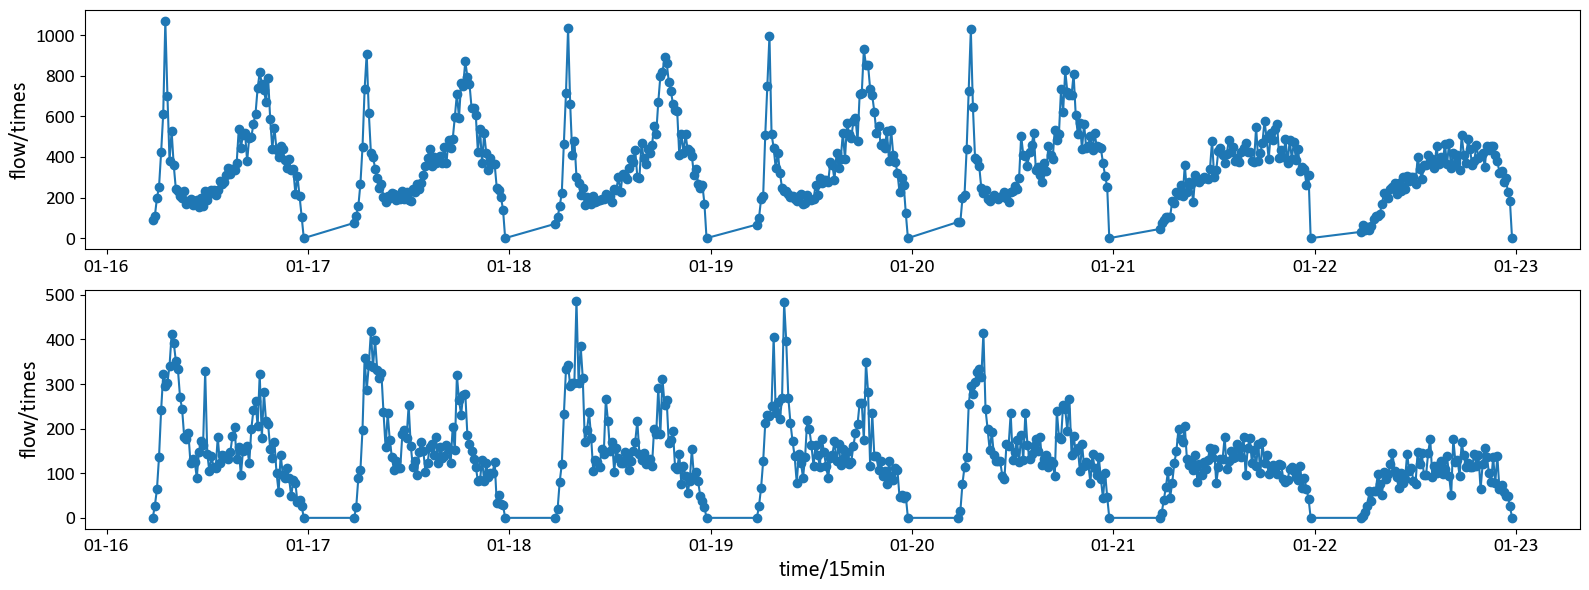

In [11]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

plt.rcParams['font.sans-serif'] = 'Calibri'
plt.rcParams['xtick.labelsize'] = 14          # X轴刻度字体大小
plt.rcParams['ytick.labelsize'] = 14

fig = plt.figure(figsize=(16, 6))

dates = merged_index
data = [server_1, server_2, station_1, station_2]
# ==================route flow==================
# plt.subplot(2, 1, 1)
# plt.plot(dates, data[0], marker='o', linestyle='-')
# # plt.text(dates[-1], min(data[0]), '2017', horizontalalignment='right', verticalalignment='top',fontsize=14)
# # 设置日期格式
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
# # plt.text(0.92, -0.15, '2017年', fontsize=14, transform=plt.gca().transAxes)
# # plt.ylabel('客流量/次',fontsize=16)
# plt.ylabel('flow/times',fontsize=16)
# plt.subplot(2, 1, 2)
# plt.plot(dates, data[1], marker='o', linestyle='-')
# # plt.text(dates[-1], min(data[1]), '2017', horizontalalignment='right', verticalalignment='top',fontsize=14)
# # 设置日期格式
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

# # plt.xlabel('时间/15min',fontsize=16)
# # plt.ylabel('客流量/次',fontsize=16)
# plt.xlabel('time/15min',fontsize=16)
# plt.ylabel('flow/times',fontsize=16)
# # plt.text(0.95, -0.15, '2017年', fontsize=14, transform=plt.gca().transAxes)

# ==================stop flow==================
plt.subplot(2, 1, 1)
plt.plot(dates, data[2], marker='o', linestyle='-')
# plt.text(dates[-1], min(data[2]), '2017', horizontalalignment='right', verticalalignment='top',fontsize=14)
# 设置日期格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
# plt.text(0.92, -0.3, '2017年', fontsize=14, transform=plt.gca().transAxes)
# plt.ylabel('客流量/次',fontsize=16)
plt.ylabel('flow/times', fontsize=16)
plt.subplot(2, 1, 2)
plt.plot(dates, data[3], marker='o', linestyle='-')
# plt.text(dates[-1], min(data[3]), '2017', horizontalalignment='right', verticalalignment='top',fontsize=14)
# 设置日期格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
# plt.text(0.95, -0.15, '2017年', fontsize=14, transform=plt.gca().transAxes)

# plt.xlabel('时间/15min',fontsize=16)
# plt.ylabel('客流量/次',fontsize=16)
plt.xlabel('time/15min', fontsize=16)
plt.ylabel('flow/times', fontsize=16)

plt.tight_layout()
plt.show()
fig.savefig('./站点43131_44009_15min客流统计图_new.svg', bbox_inches='tight')
# fig.savefig('./线路113_185_15min客流统计图_new.svg',bbox_inches='tight')